# Weight evolution after training

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history, get_weights
from connectivity_functions import artificial_connectivity_matrix

## An example where we extract the time-trace

epochs 0
epochs 1


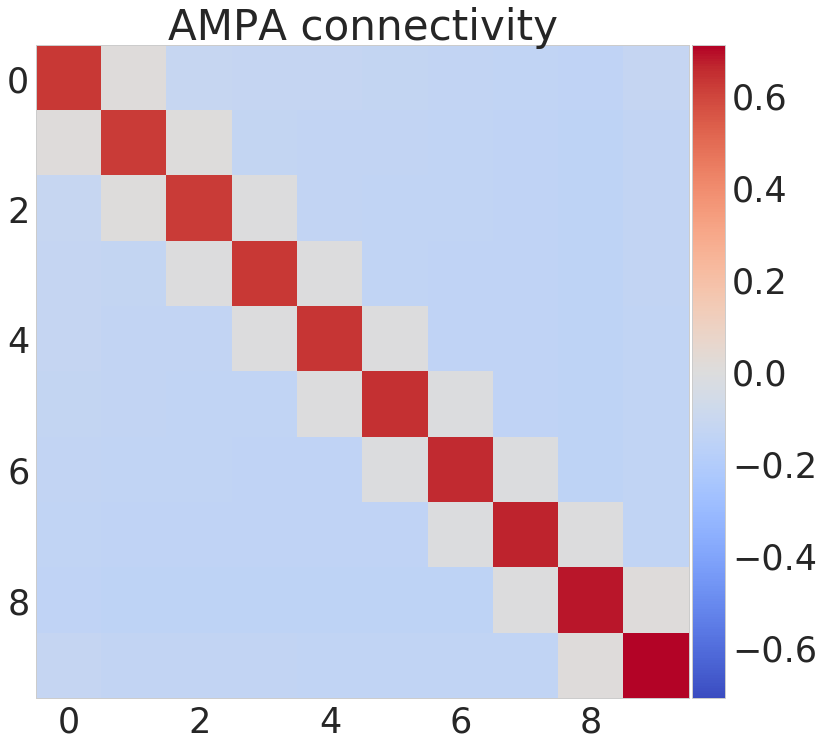

In [7]:
from_pattern = 2
to_pattern = 3
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = tau_z_pre_ampa
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'w_ampa']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 2
resting_time=resting_time = 3.0

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                  diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                  always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

plot_weight_matrix(manager.nn, ampa=True)

In [8]:
o = manager.history['o']
w = manager.history['w_ampa'][:, to_pattern, from_pattern]
time = np.linspace(0, manager.T_total, num=o.shape[0])

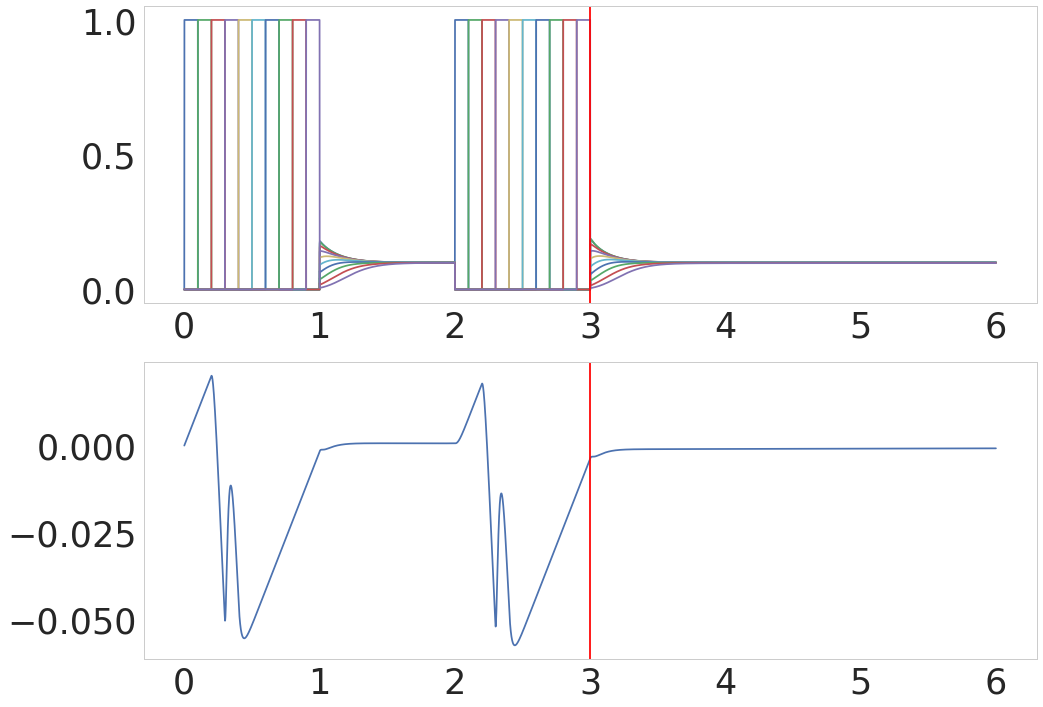

In [12]:
training_time = np.linspace(0, manager.T_total, num=o.shape[0])
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(211)
for pattern in patterns_indexes:
    ax1.plot(training_time, o[:, pattern])
    
ax2 = fig.add_subplot(212)
ax2.plot(training_time, w)
ax2.axvline(3.0, color='red')
ax1.axvline(3.0, color='red')

## Discussion of weight evolution for Lansner

epochs 0
epochs 1
epochs 2
epochs 3
epochs 4
epochs 5
epochs 6
epochs 7
epochs 8
epochs 9
epochs 10
epochs 11
epochs 12
epochs 13
epochs 14


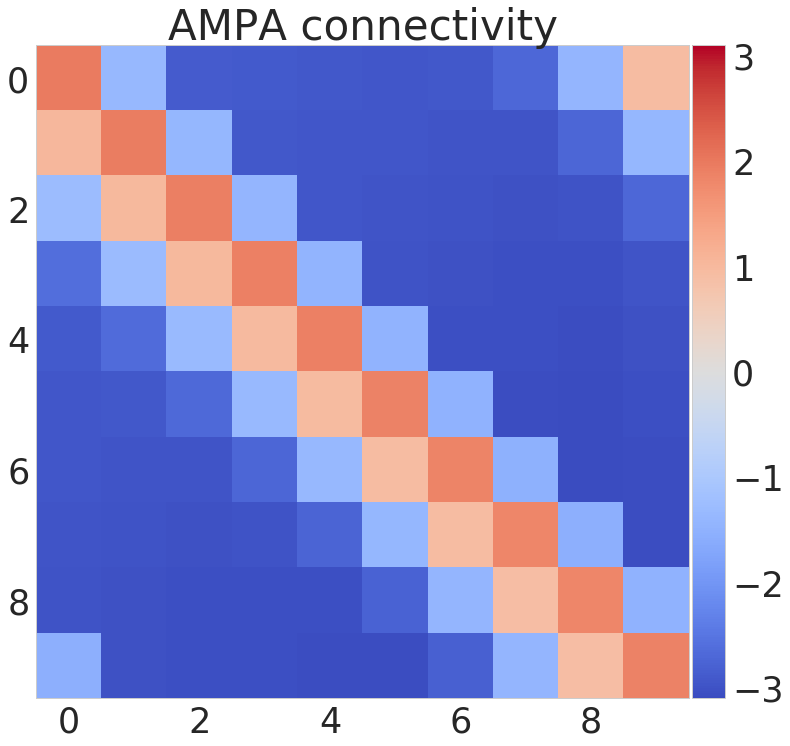

In [37]:
from_pattern = 2
to_pattern = 3
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.080
tau_z_post_ampa = 0.020
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 'z_pre_ampa', 'w_ampa']

# Protocol
training_time = 0.200
inter_sequence_interval = 0.0
inter_pulse_interval = 0.0
epochs = 15
resting_time=resting_time = 0.0

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                  diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                  always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

plot_weight_matrix(manager.nn, ampa=True)

In [35]:
z = manager.history['z_pre_ampa']
w = manager.history['w_ampa']
from_pattern = 1
to_pattern = 2
time = np.linspace(0, manager.T_total, num=z.shape[0])

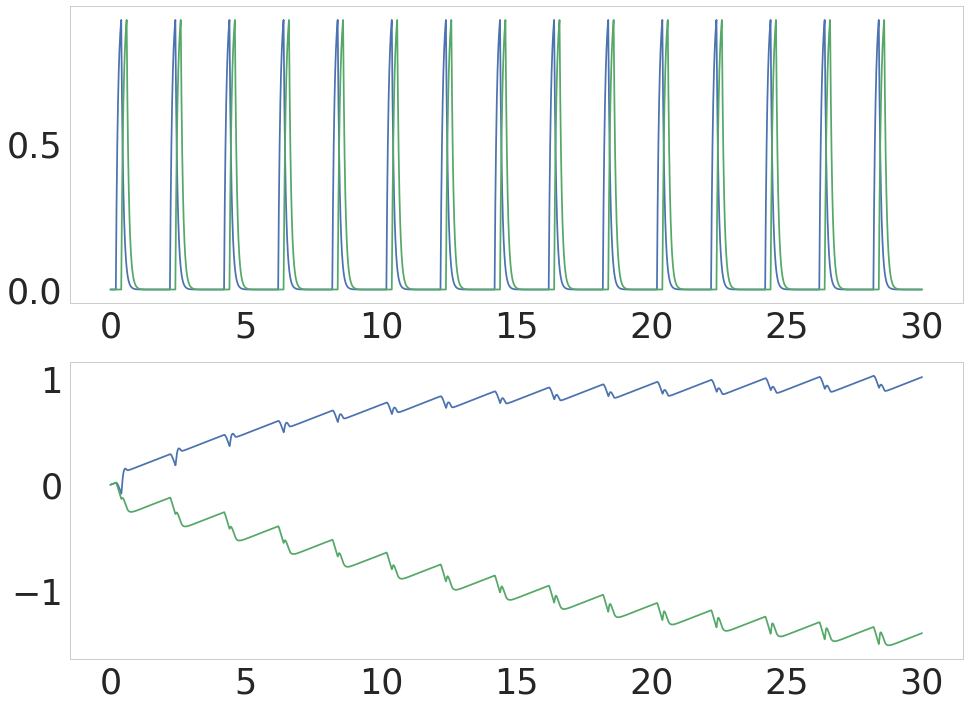

In [36]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(time, z[:, from_pattern])
ax1.plot(time, z[:, to_pattern])

ax2.plot(time, w[:, to_pattern, from_pattern])
ax2.plot(time, w[:, from_pattern, to_pattern])